In [57]:

import torch
import glob
from tqdm import tqdm
import pickle
import numpy as np
role = "Edward Cullen"
data_type = "train"

file_paths = {
    "answerable":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/mistral/{data_type}/{role}/rep_answer.pkl",
    "out_series":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/mistral/{data_type}/{role}/rep_out_series.pkl",
    "fake":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/mistral/{data_type}/{role}/rep_fake.pkl",
    "absent":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/mistral/{data_type}/{role}/rep_absent.pkl",
    "context_conflict":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/mistral/{data_type}/{role}/rep_context_conflict.pkl",
         }
all_dataset = {}

for key in file_paths.keys():
    file_path = file_paths[key]
    paths = glob.glob(file_path)
    dataset = []
    for path in tqdm(paths):
        with open(path,"rb") as f:
            data = pickle.load(f)
    if data:
        all_dataset[key] =np.array(data).transpose(1,0,2)


100%|██████████| 1/1 [00:00<00:00, 29.21it/s]


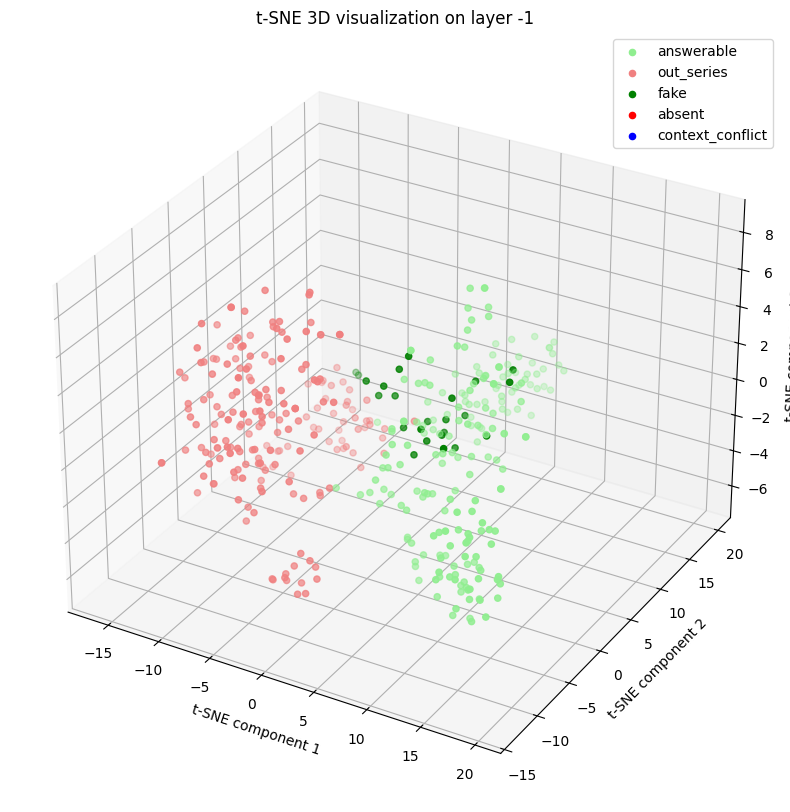

In [58]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
i = -1  # 你可以选择任何你感兴趣的层
data = []
labels = []

for label, tensors in all_dataset.items():
    layer_data = tensors[i]  # 提取第i层的数据并转换为numpy数组
    data.append(layer_data)
    labels.extend([label] * layer_data.shape[0])

# 将所有数据合并成一个数组
data = np.vstack(data)

# 使用t-SNE进行降维
tsne = TSNE(n_components=3, random_state=42)
data_3d = tsne.fit_transform(data)

# 绘制三维可视化图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 为每个label分配一个颜色
unique_labels = list(file_paths.keys())
custom_colors = ['lightgreen', 'lightcoral', 'green', 'red', 'blue', 'darkorange', 'lightblue', 'peachpuff']

for idx, label in enumerate(unique_labels):
    indices = [i for i, l in enumerate(labels) if l == label]
    ax.scatter(data_3d[indices, 0], data_3d[indices, 1], data_3d[indices, 2], label=label, color=custom_colors[idx])


ax.legend()
ax.set_title(f't-SNE 3D visualization on layer {i}')
ax.set_xlabel('t-SNE component 1')
ax.set_ylabel('t-SNE component 2')
ax.set_zlabel('t-SNE component 3')
plt.show()

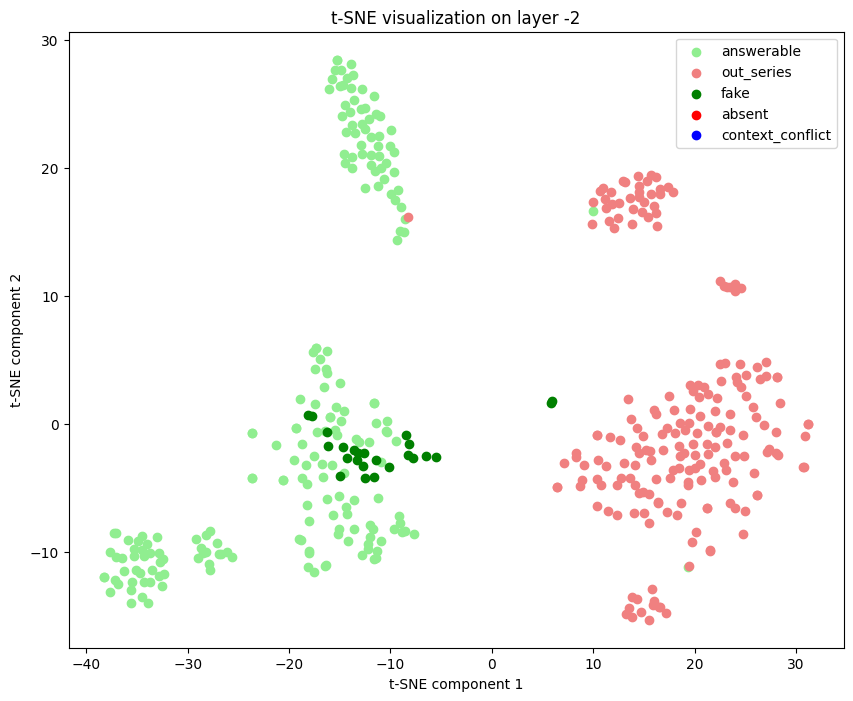

In [59]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
i = -2 # 你可以选择任何你感兴趣的层
data = []
labels = []

for label, tensors in all_dataset.items():
    layer_data = tensors[i]  # 提取第i层的数据并转换为numpy数组
    data.append(layer_data)
    labels.extend([label] * layer_data.shape[0])

# 将所有数据合并成一个数组
data = np.vstack(data)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(data)

# 绘制可视化图
plt.figure(figsize=(10, 8))

# 为每个label分配一个颜色
# 为每个label分配一个颜色
unique_labels = list(file_paths.keys())
custom_colors = ['lightgreen', 'lightcoral', 'green', 'red', 'blue', 'darkorange', 'lightblue', 'peachpuff']

for idx, label in enumerate(unique_labels):
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=label, color=custom_colors[idx])

plt.legend()
plt.title(f't-SNE visualization on layer {i}')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

In [3]:

import torch
import glob
from tqdm import tqdm
import pickle
import numpy as np

def load_role_data(role,data_type,model):
    file_paths = {
        "answerable":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/base/{model}/{data_type}/{role}/rep_answer.pkl",
        "out_series":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/base/{model}/{data_type}/{role}/rep_out_series.pkl",
        "fake":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/base/{model}/{data_type}/{role}/rep_fake.pkl",
        "absent":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/base/{model}/{data_type}/{role}/rep_absent.pkl",
        "context_conflict":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/base/{model}/{data_type}/{role}/rep_context_conflict.pkl",
            }
    all_dataset = {}
    for key in file_paths.keys():
        file_path = file_paths[key]
        paths = glob.glob(file_path)
        dataset = []
        for path in tqdm(paths):
            with open(path,"rb") as f:
                data = pickle.load(f)
        if data:
            all_dataset[key] =np.array(data).transpose(1,0,2)
    return all_dataset
roles = ['Harry Potter', 'Hermione Granger', 'Ronald Weasley', 'Aragorn', 'Frodo Baggins', 'Legolas', 'Samwise Gamgee', 'Gandalf', 'Jacob Black', 'Bella Swan', 'Edward Cullen', 'Gale Hawthorne', 'Katniss Everdeen', 'Peeta Mellark']

data_type = "test"
# model = "llama3"
model = "llama3.1-instruct"
# model = "qwen2"
# model = "mistral"
dataset = {}
for role in roles:
    dataset[role] = load_role_data(role,data_type,model)

100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


In [23]:
label_setting = "Gandalf_fake_setting"
indices_setting = [i for i, l in enumerate(labels) if l == label_setting]

In [40]:
for role in roles:
    all_dataset = dataset[role]
    index_num = 0
    for label, tensors in all_dataset.items():
        layer_data = tensors[i]  # 提取第i层的数据并转换为numpy数组
        data.append(layer_data)
        
        if setting_role == role and label == "fake":
            print(len(labels))

        labels.extend([f"{role}_{label}"] * layer_data.shape[0])
        if setting_role == role and label == "fake":
            print(len(labels))
        index_num += 1

5180
5230


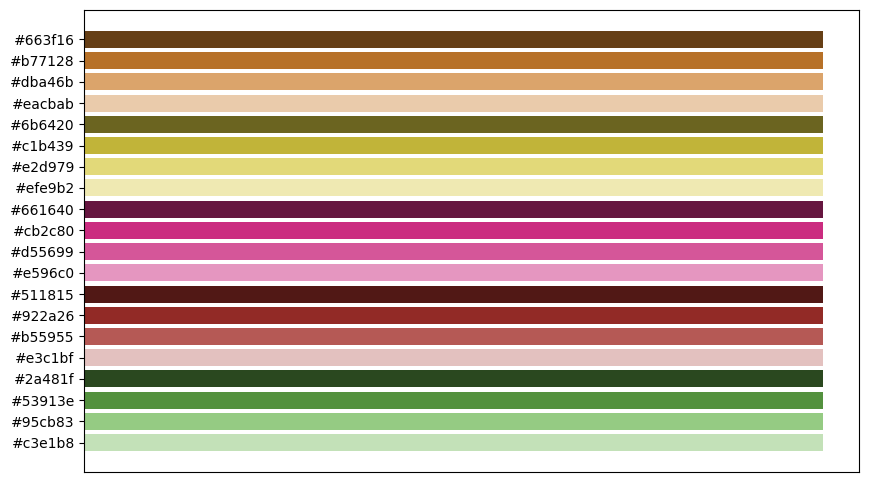

In [49]:
import matplotlib.pyplot as plt

# 定义自定义颜色列表
custom_colors = [
    "#c3e1b8", "#95cb83", "#53913e", "#2a481f",
    "#e3c1bf", "#b55955", "#922a26", "#511815",
    "#e596c0", "#d55699", "#cb2c80", "#661640",
    "#efe9b2", "#e2d979", "#c1b439", "#6b6420",
    "#eacbab", "#dba46b", "#b77128", "#663f16"
]

# 创建图形和子图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制条形图，每个条形使用不同的颜色
for i, color in enumerate(custom_colors):
    ax.barh(i, 1, color=color)

# 设置y轴的刻度
ax.set_yticks(range(len(custom_colors)))
ax.set_yticklabels(custom_colors)

# 去掉x轴
ax.xaxis.set_visible(False)

# 显示图表
plt.show()

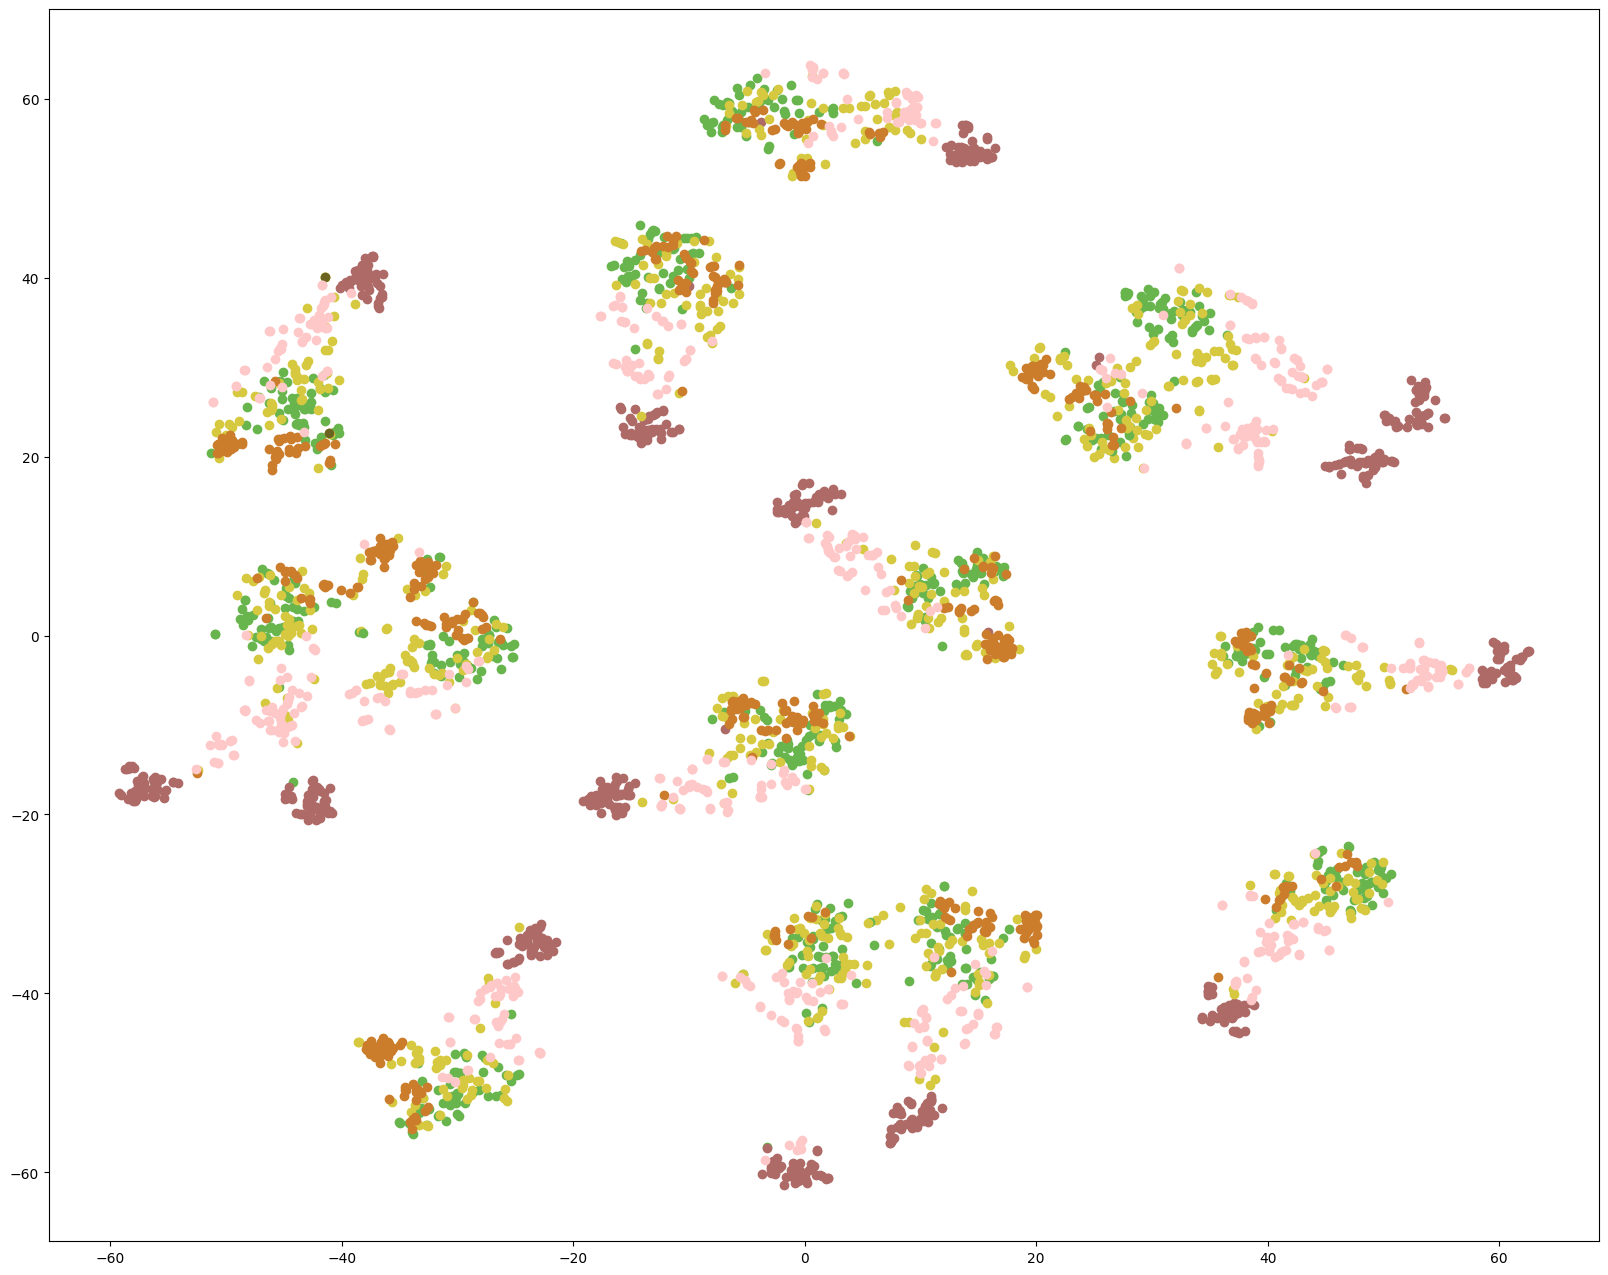

In [56]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
i = -1 # 你可以选择任何你感兴趣的层
data = []
labels = []
setting_role = roles[7]

# setting_index= [4, 6, 12, 13, 23]
# setting_index= [9,4,15, 16, 18, 28, 39 ,43]
setting_index= [6,16]
for role in roles:
    all_dataset = dataset[role]
    index_num = 0
    for label, tensors in all_dataset.items():
        layer_data = tensors[i]  # 提取第i层的数据并转换为numpy数组
        data.append(layer_data)
        
        if setting_role == role and label == "fake":
            start_index = len(labels)

        labels.extend([f"{role}_{label}"] * layer_data.shape[0])
        # if setting_role == role and label == "fake":
        #     print(len(labels))
        index_num += 1
setting_index = [start_index + _ for _ in setting_index]
# 将所有数据合并成一个数组
data = np.vstack(data)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(data)

# 绘制可视化图
plt.figure(figsize=(20, 16))

# 为每个label分配一个颜色
# 为每个label分配一个颜色
unique_labels = []
for role in roles:
    for label in list(all_dataset.keys()):
        unique_labels.append( f"{role}_{label}")
# unique_labels = list(set(labels))
# custom_colors = ['lightgreen', 'lightcoral', 'green', 'red', 'blue', 'darkorange', 'lightblue', 'peachpuff']
custom_colors = ['#68B54E', '#ae6a67', '#D6C83F', '#CB7D2C', '#FFC8C8']
setting_colors = ['lightgreen', 'lightcoral', 'green', 'red', 'blue', 'darkorange', 'lightblue', 'peachpuff']
# custom_colors = [
#     "#c3e1b8", "#95cb83", "#53913e", "#2a481f",
#     "#e3c1bf", "#b55955", "#922a26", "#511815",
#     "#e596c0", "#d55699", "#cb2c80", "#661640",
#     "#efe9b2", "#e2d979", "#c1b439", "#6b6420",
#     "#eacbab", "#dba46b", "#b77128", "#663f16"
# ]
for idx, label in enumerate(unique_labels):
    indices = [i for i, l in enumerate(labels) if l == label]
    # plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=label, color=custom_colors[idx])

    # else:
    #     color = custom_colors[idx % len(custom_colors)]
    # plt.scatter(data_2d[indices, 0], data_2d[indices, 1],color=color)
    color = custom_colors[idx % len(custom_colors)]
    plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=label,color=color)
    if setting_role in label and "fake" in label:
        color_setting = '#6b6420'
        label_setting = f"{label}_setting"
        plt.scatter(data_2d[setting_index, 0], data_2d[setting_index, 1], label=label_setting,color=color_setting)

# plt.legend()
plt.show()

In [ ]:

import torch
import glob
from tqdm import tqdm
import pickle
import numpy as np
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def load_role_data(role,data_type,model):
    file_paths = {
        "answerable":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model}/{data_type}/{role}/rep_answer.pkl",
        "out_series":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model}/{data_type}/{role}/rep_out_series.pkl",
        "fake":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model}/{data_type}/{role}/rep_fake.pkl",
        "absent":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model}/{data_type}/{role}/rep_absent.pkl",
        "context_conflict":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model}/{data_type}/{role}/rep_context_conflict.pkl",
            }
    all_dataset = {}
    for key in file_paths.keys():
        file_path = file_paths[key]
        paths = glob.glob(file_path)
        dataset = []
        for path in tqdm(paths):
            with open(path,"rb") as f:
                data = pickle.load(f)
        if data:
            all_dataset[key] =np.array(data).transpose(1,0,2)
    return all_dataset
roles = ['Harry Potter', 'Hermione Granger', 'Ronald Weasley', 'Aragorn', 'Frodo Baggins', 'Legolas', 'Samwise Gamgee', 'Gandalf', 'Jacob Black', 'Bella Swan', 'Edward Cullen', 'Gale Hawthorne', 'Katniss Everdeen', 'Peeta Mellark']

series = {
  "Harry Potter": 0,
  "Hermione Granger": 0,
  "Ronald Weasley": 0,
  "Aragorn": 1,
  "Frodo Baggins": 1,
  "Legolas": 1,
  "Samwise Gamgee": 1,
  "Gandalf": 1,
  "Jacob Black": 2,
  "Bella Swan": 2,
  "Edward Cullen": 2,
  "Gale Hawthorne": 3,
  "Katniss Everdeen": 3,
  "Peeta Mellark": 3
}



data_type = "test"
# model = "llama3"
# model = "llama3.1"
# model = "qwen2"
# model = "mistral"
models = ["llama3","llama3.1","qwen2","mistral"]
for model in models:
    dataset = {}
    for role in roles:
        dataset[role] = load_role_data(role,data_type,model)



    i = -1 # 你可以选择任何你感兴趣的层
    data = []
    labels = []
    # setting_role = roles[0]
    
    for role in roles:
        all_dataset = dataset[role]
        for label, tensors in all_dataset.items():
            layer_data = tensors[i]  # 提取第i层的数据并转换为numpy数组
            data.append(layer_data)
            labels.extend([f"{role}_{label}"] * layer_data.shape[0])

    # 将所有数据合并成一个数组
    data = np.vstack(data)

    # 使用t-SNE进行降维
    tsne = TSNE(n_components=2, random_state=42)
    data_2d = tsne.fit_transform(data)

    # 绘制可视化图
    

    # 为每个label分配一个颜色
    # 为每个label分配一个颜色
    unique_labels = []
    for role in roles:
        for label in list(all_dataset.keys()):
            unique_labels.append( f"{role}_{label}")
    # custom_colors = ['lightgreen', 'lightcoral', 'green', 'red', 'blue', 'darkorange', 'lightblue', 'peachpuff']
    custom_colors = ['#68B54E', '#ae6a67', '#D6C83F', '#CB7D2C', '#FFC8C8']
    setting_colors = ['green', 'red', 'blue', 'darkorange', 'peachpuff']
    for setting_role in roles:
        plt.figure(figsize=(20, 16))
        for idx, label in enumerate(unique_labels):
            indices = [i for i, l in enumerate(labels) if l == label]
            # plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=label, color=custom_colors[idx])
            if setting_role in label:
                # print(1)
                color = setting_colors[idx % len(setting_colors)]
            else:
                color = custom_colors[idx % len(custom_colors)]
            # plt.scatter(data_2d[indices, 0], data_2d[indices, 1],color=color)
            plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=label,color=color)

        # plt.legend()
        plt.title(f'{setting_role}')
        # plt.savefig(f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/picture/tsne/marked/{model}_{series[setting_role]}_{setting_role}.png")
        plt.show()

100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


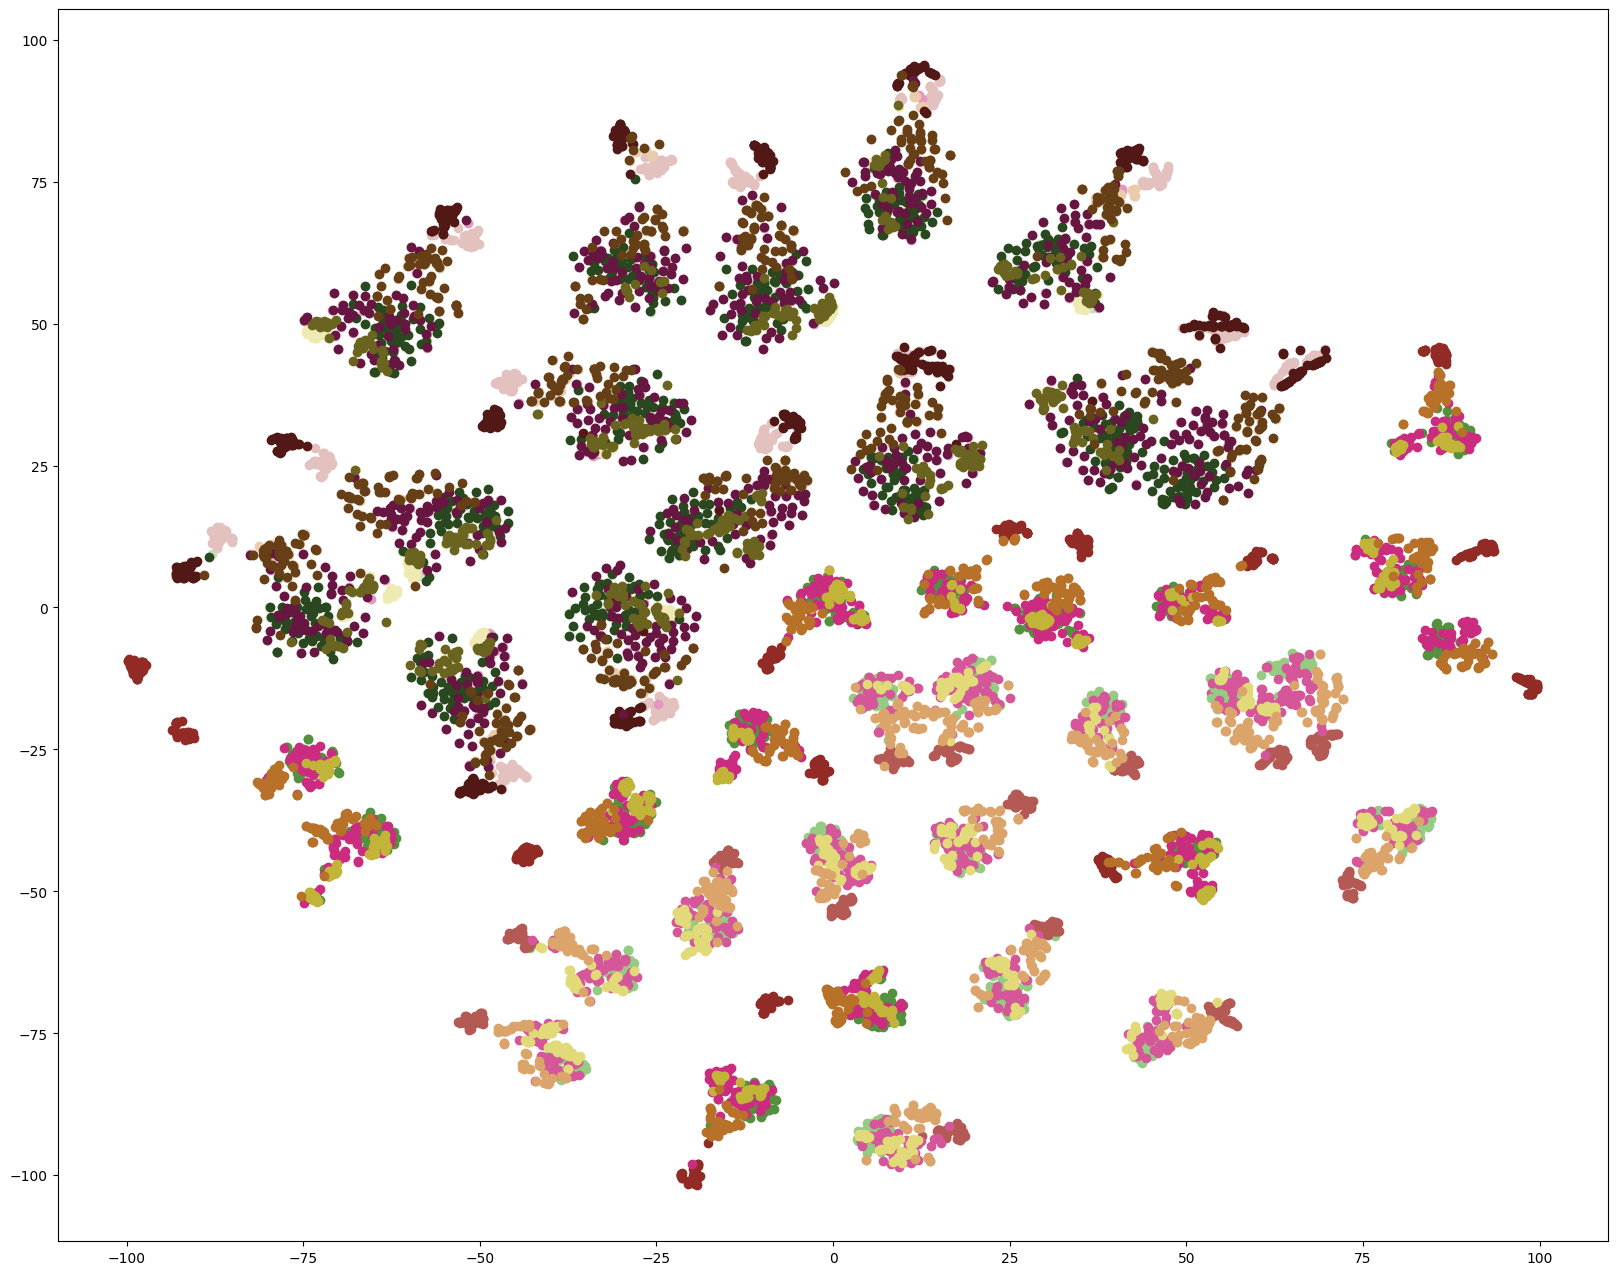

In [1]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
layer_id = -1 
roles = ['Harry Potter', 'Hermione Granger', 'Ronald Weasley', 'Aragorn', 'Frodo Baggins', 'Legolas', 'Samwise Gamgee', 'Gandalf', 'Jacob Black', 'Bella Swan', 'Edward Cullen', 'Gale Hawthorne', 'Katniss Everdeen', 'Peeta Mellark']
# roles = ['Aragorn', 'Frodo Baggins', 'Legolas', 'Samwise Gamgee', 'Gandalf']


import torch
import glob
from tqdm import tqdm
import pickle
import numpy as np

def load_role_data(role,data_type,model,model_type="base"):
    file_paths = {
        "answerable":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model_type}/{model}/{data_type}/{role}/rep_answer.pkl",
        "out_series":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model_type}/{model}/{data_type}/{role}/rep_out_series.pkl",
        "fake":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model_type}/{model}/{data_type}/{role}/rep_fake.pkl",
        "absent":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model_type}/{model}/{data_type}/{role}/rep_absent.pkl",
        "context_conflict":f"/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/{model_type}/{model}/{data_type}/{role}/rep_context_conflict.pkl",
            }
    all_dataset = {}
    for key in file_paths.keys():
        file_path = file_paths[key]
        paths = glob.glob(file_path)
        dataset = []
        for path in tqdm(paths):
            with open(path,"rb") as f:
                data = pickle.load(f)
            if data:
                all_dataset[key] =np.array(data).transpose(1,0,2)
    return all_dataset
# roles = ['Harry Potter', 'Hermione Granger', 'Ronald Weasley', 'Aragorn', 'Frodo Baggins', 'Legolas', 'Samwise Gamgee', 'Gandalf', 'Jacob Black', 'Bella Swan', 'Edward Cullen', 'Gale Hawthorne', 'Katniss Everdeen', 'Peeta Mellark']

data_type = "test"
# model = "llama3-instruct"
model = "llama3.1-instruct"
# model = "qwen2"
# model = "mistral-instruct"
model_types = ["base","lora","ft","repe"]
# model_types = ["base","repe"]
dataset = {}
for model_type in model_types:
    for role in roles:
        data_name = f"{model_type}_{role}"
        dataset[data_name] = load_role_data(role,data_type,model,model_type)

data = []
labels = []
setting_role = roles[0]
for model_type in model_types:
    for role in roles:
        data_name = f"{model_type}_{role}"
        all_dataset = dataset[data_name]
        for label, tensors in all_dataset.items():
            layer_data = tensors[layer_id]  # 提取第i层的数据并转换为numpy数组
            data.append(layer_data)
            labels.extend([f"{model_type}_{role}_{label}"] * layer_data.shape[0])

# 将所有数据合并成一个数组
data = np.vstack(data)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(data)

# 绘制可视化图
plt.figure(figsize=(20, 16))

# 为每个label分配一个颜色
# 为每个label分配一个颜色
unique_labels = []
for model_type in model_types:
    for role in roles:
        for label in list(all_dataset.keys()):
            unique_labels.append( f"{model_type}_{role}_{label}")
# custom_colors = ['lightgreen', 'lightcoral', 'green', 'red', 'blue', 'darkorange', 'lightblue', 'peachpuff']
# custom_colors = ['#68B54E', '#ae6a67', '#D6C83F', '#CB7D2C', '#FFC8C8']
setting_colors = ['lightgreen', 'lightcoral', 'green', 'red', 'blue', 'darkorange', 'lightblue', 'peachpuff']
custom_colors = [
    ["#c3e1b8", "#e3c1bf", "#e596c0", "#efe9b2", "#eacbab"],
    ["#95cb83", "#b55955", "#d55699", "#e2d979", "#dba46b"],
    ["#53913e", "#922a26", "#cb2c80", "#c1b439", "#b77128"],
    ["#2a481f", "#511815", "#661640", "#6b6420", "#663f16"]
]
for idx, label in enumerate(unique_labels):
    indices = [i for i, l in enumerate(labels) if l == label]
    # plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=label, color=custom_colors[idx])
    if "base" in label:
        index = 0
    elif "lora" in label:
        index = 1
    elif "ft" in label:
        index = 2
    elif "repe" in label:
        index = 3
    color = custom_colors[index][idx % len(custom_colors[index])]
    # plt.scatter(data_2d[indices, 0], data_2d[indices, 1],color=color)
    plt.scatter(data_2d[indices, 0], data_2d[indices, 1], label=label,color=color)

# plt.legend()
plt.show()

In [51]:
dataset.keys()

dict_keys(['base_Aragorn', 'base_Frodo Baggins', 'base_Legolas', 'base_Samwise Gamgee', 'base_Gandalf', 'lora_Aragorn', 'lora_Frodo Baggins', 'lora_Legolas', 'lora_Samwise Gamgee', 'lora_Gandalf', 'ft_Aragorn', 'ft_Frodo Baggins', 'ft_Legolas', 'ft_Samwise Gamgee', 'ft_Gandalf', 'repe_Aragorn', 'repe_Frodo Baggins', 'repe_Legolas', 'repe_Samwise Gamgee', 'repe_Gandalf'])

In [77]:
key

'repe_Gandalf'

In [90]:
import pickle as pkl
d1 = pkl.load(open("/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/base/llama3-instruct/test/Aragorn/rep_absent.pkl","rb"))
d2 = pkl.load(open("/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/ft/llama3-instruct/test/Aragorn/rep_absent.pkl","rb"))
d3 = pkl.load(open("/apdcephfs_cq10/share_2992827/siyuan/leoleoliu/research/code/roleplay_refuse_answer/data/representation/lora/llama3-instruct/test/Aragorn/rep_absent.pkl","rb"))

(array([1.0277902 , 0.12345362, 1.7275374 , ..., 3.105248  , 1.8728305 ,
        1.9332234 ], dtype=float32),
 array([1.4167665, 0.9315906, 2.3442867, ..., 2.2448409, 1.6189086,
        1.6856183], dtype=float32),
 array([-0.49690175, -0.74831116,  4.1451197 , ...,  2.7784324 ,
         1.9991122 ,  3.1212142 ], dtype=float32))

50